In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
import xgboost as xgb

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders
from sklearn.decomposition import PCA

In [54]:
import matplotlib.pyplot as plt

In [5]:
features = pd.read_csv('features_10.csv')
kaggle = pd.read_csv('trocafone_kaggle_test.csv')
labels = pd.read_csv('labels_training_set.csv')

In [63]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38829 entries, 0 to 38828
Columns: 141 entries, person to precio_mas_barato_que_vio
dtypes: bool(46), float64(6), int64(75), object(14)
memory usage: 29.8+ MB


In [6]:
training = labels.set_index('person').join(features.set_index('person'))
train_labels = training['label']
train_data = training.drop('label',axis=1)

In [7]:
predict_data = kaggle.set_index('person').join(features.set_index('person'))

In [8]:
encoder = category_encoders.TargetEncoder(smoothing=True)
train_data_enc = encoder.fit_transform(np.array(train_data),np.array(train_labels))
predict_data_enc = encoder.transform(np.array(predict_data))

In [66]:
pca = PCA(n_components = 140)

In [67]:
scaler = StandardScaler()
train_data_pca = pca.fit_transform(scaler.fit_transform(train_data_enc.fillna(0)))
predict_data_pca = pca.fit_transform(scaler.fit_transform(predict_data_enc.fillna(0)))

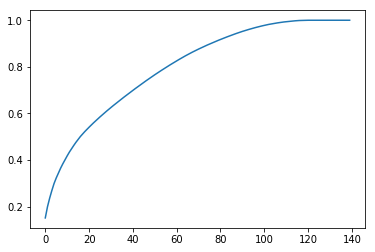

In [68]:
plt.plot(np.cumsum(pca.singular_values_**2)/sum(pca.singular_values_**2))

In [69]:
pca = PCA(n_components = 110)

In [70]:
scaler = StandardScaler()
train_data_pca = pca.fit_transform(scaler.fit_transform(train_data_enc.fillna(0)))
predict_data_pca = pca.fit_transform(scaler.fit_transform(predict_data_enc.fillna(0)))

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(train_data_pca,np.array(train_labels))

In [71]:
train = xgb.DMatrix(data=xtrain,label=ytrain)
test = xgb.DMatrix(data=xtest,label=ytest)
data = xgb.DMatrix(data=train_data_pca,label=np.array(train_labels))
pred = xgb.DMatrix(data=predict_data_pca)
params = {'colsample_bytree': 0.9,
 'gamma': 2,
 'learning_rate': 0.016238752458245277,
 'max_depth': 13,
 'min_child_weight': 5,
 'n_estimators': 100,
 'subsample': 0.7847190225361189,
 'eval_metric':'auc'}

In [72]:
bst = xgb.train(params,train,200,[(train,'train'),(test,'eval')])

[03:06:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 314 pruned nodes, max_depth=13
[0]	train-auc:0.852466	eval-auc:0.819922
[03:06:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 342 pruned nodes, max_depth=13
[1]	train-auc:0.866733	eval-auc:0.839307
[03:06:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 320 pruned nodes, max_depth=9
[2]	train-auc:0.877521	eval-auc:0.841774
[03:06:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 354 pruned nodes, max_depth=12
[3]	train-auc:0.883242	eval-auc:0.842566
[03:06:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 284 pruned nodes, max_depth=12
[4]	train-auc:0.889501	eval-auc:0.846325
[03:06:35] C:\Users\Admin

In [ ]:
bst = xgb.train(params,data,200,verbose_eval=False)

In [45]:
xg_prediction = bst.predict(pred)

In [46]:
submit = kaggle.set_index('person')

In [47]:
submit['label'] = xg_prediction

In [48]:
submit.to_csv('submit.csv')